# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

In [17]:
x = [-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3]
y = [-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90]
len(x)

15

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

In [18]:
# ... ENTER YOUR CODE HERE
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la


def coeff_matrix(x0, y0, m):
    x = np.asarray(x0)
    y = np.asarray(y0)
    n = x.shape[0]
    X = np.empty([n,m])
    for i in range(m):
        X[:,i] = x**i
    return X
    
def ls(x0,y0,m):
    x = np.asarray(x0)
    y = np.asarray(y0)
    X = coeff_matrix(x0,y0,m)
    coeff = ((la.inv(X.T@X)) @ X.T)@y
    return coeff

def ls_func(x0,beta):
    x = np.asarray(x0)
    y = np.zeros_like(x)
    for i in range(beta.size):
        y += (beta[i] * (x ** i))
    return y

### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

In [19]:
# ... ENTER YOUR CODE HERE ...
sigma_prev = 1000.
for i in range(0,14):
    coeff = ls(x, y, i)
    sigma_curr = 1/(15-i)*np.sum((ls_func(x,coeff)-y)**2)
    if sigma_curr-sigma_prev>=0:
        power = i-1
        break
    sigma_prev = sigma_curr


Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

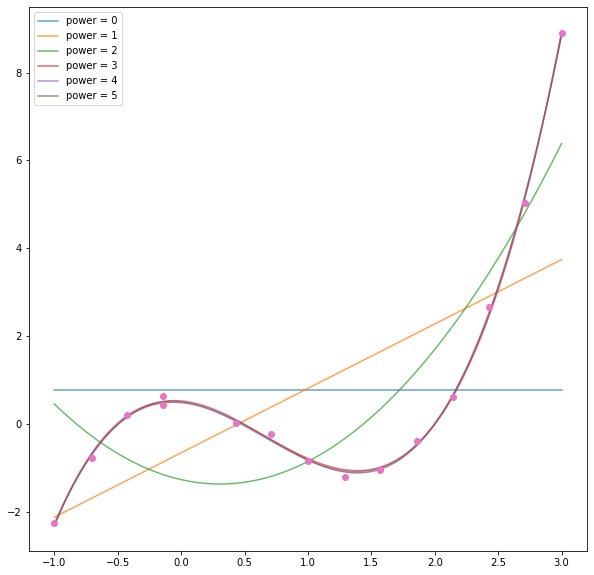

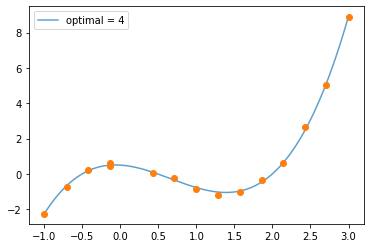

In [20]:
# ... ENTER YOUR CODE HERE
plt.figure(figsize=(10,10))
for i in range(1,7):
    coeff = ls(x,y,i)
    plt.plot(np.linspace(-1,3,1000),ls_func(np.linspace(-1,3,1000),coeff),alpha=0.7, label = "power = {}".format(i-1))
plt.plot(x,y,"o")
plt.legend()
plt.show()


coeff = ls(x,y,power)
plt.plot(np.linspace(-1,3,1000),ls_func(np.linspace(-1,3,1000),coeff),alpha=0.7, label = "optimal = {}".format(power))
plt.plot(x,y,"o")
plt.legend()
plt.show()


### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

In [29]:
# ... ENTER YOUR CODE HERE ...
print(coeff_matrix(x,y,power))
q, r = la.qr(coeff_matrix(x,y,power))
print(q.shape)
print(r)
coeffs_qr = la.inv(r)@q.T @ np.asarray(y)
coeffs = ls(x,y,power)
print(coeffs_qr-coeffs)

[[ 1.0000000e+00 -1.0000000e+00  1.0000000e+00 -1.0000000e+00]
 [ 1.0000000e+00 -7.0000000e-01  4.9000000e-01 -3.4300000e-01]
 [ 1.0000000e+00 -4.3000000e-01  1.8490000e-01 -7.9507000e-02]
 [ 1.0000000e+00 -1.4000000e-01  1.9600000e-02 -2.7440000e-03]
 [ 1.0000000e+00 -1.4000000e-01  1.9600000e-02 -2.7440000e-03]
 [ 1.0000000e+00  4.3000000e-01  1.8490000e-01  7.9507000e-02]
 [ 1.0000000e+00  7.1000000e-01  5.0410000e-01  3.5791100e-01]
 [ 1.0000000e+00  1.0000000e+00  1.0000000e+00  1.0000000e+00]
 [ 1.0000000e+00  1.2900000e+00  1.6641000e+00  2.1466890e+00]
 [ 1.0000000e+00  1.5700000e+00  2.4649000e+00  3.8698930e+00]
 [ 1.0000000e+00  1.8600000e+00  3.4596000e+00  6.4348560e+00]
 [ 1.0000000e+00  2.1400000e+00  4.5796000e+00  9.8003440e+00]
 [ 1.0000000e+00  2.4300000e+00  5.9049000e+00  1.4348907e+01]
 [ 1.0000000e+00  2.7100000e+00  7.3441000e+00  1.9902511e+01]
 [ 1.0000000e+00  3.0000000e+00  9.0000000e+00  2.7000000e+01]]
(15, 4)
[[ -3.87298335  -3.80326965  -9.76515947 -21.5

Ну ничего себе, и два способа решения одной и той же системы дают один и тот же результат

# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

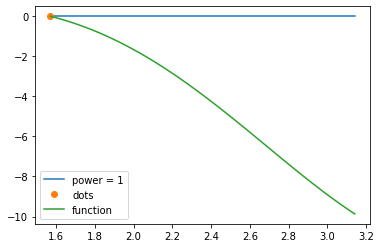

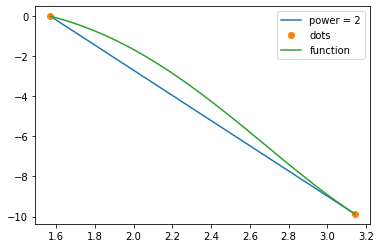

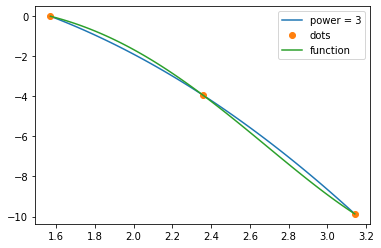

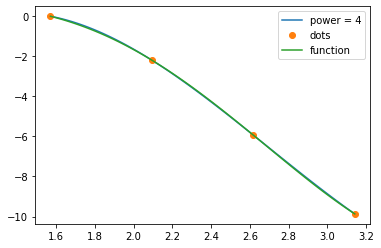

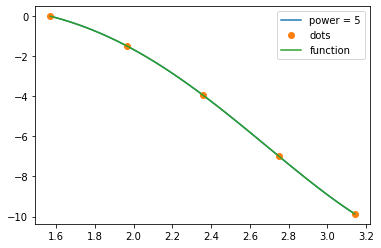

In [22]:
# ... ENTER YOUR CODE HERE ...
def lag_poly(X,x0,y0):
    x = np.asarray(x0)
    y = np.asarray(y0)
    n = x.shape[0]
    L = 0.
    l = 1.
    for i in range(n):
        l=1.
        for j in range(n):
            if i!=j:
                l *= (X-x[j])/(x[i]-x[j])
        L += y[i]*l 
    if n!=1:
        return L
    else:
        return L*np.ones_like(X)

x_grid = np.linspace(np.pi/2,np.pi, 100)
y_grid = (x_grid**2)*np.cos(x_grid)
for m in range(1,6):
    x_int = np.linspace(np.pi/2,np.pi, m)
    y_int = (x_int**2)*np.cos(x_int)
    #print(lag_poly(x_grid, x_int, y_int))
    plt.plot(x_grid, lag_poly(x_grid, x_int, y_int), label = "power = {}".format(m))
    plt.plot(x_int, y_int, "o", label ="dots")
    plt.plot(x_grid, y_grid, label="function")
    plt.legend()
    plt.show()
   


### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

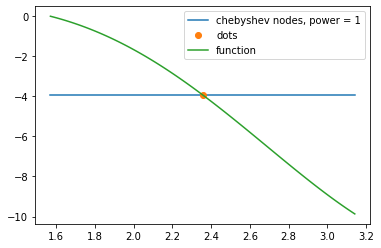

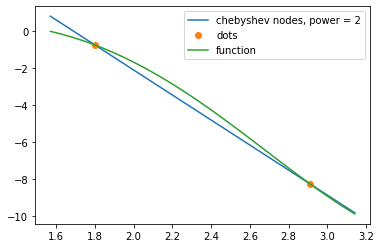

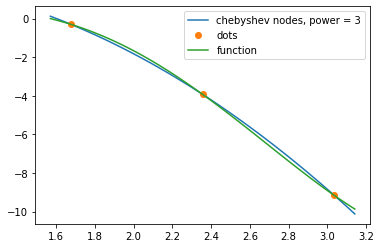

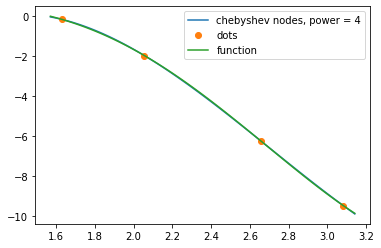

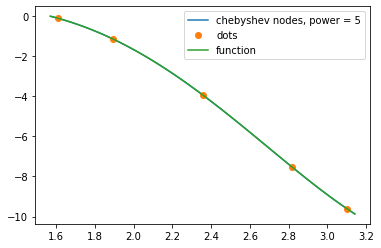

In [23]:
# ... ENTER YOUR CODE HERE ...
for m in range(1,6):
    x_int_cheb = (np.pi/2+np.pi)/2+1/2*(-np.pi/2+np.pi)*np.cos((2*np.arange(1,m+1)-1)/2/m*np.pi)
    y_int_cheb = (x_int_cheb**2)*np.cos(x_int_cheb)
    #print(lag_poly(x_grid, x_int, y_int))
    plt.plot(x_grid, lag_poly(x_grid, x_int_cheb, y_int_cheb), label = "chebyshev nodes, power = {}".format(m))
    plt.plot(x_int_cheb, y_int_cheb, "o", label ="dots")
    plt.plot(x_grid, y_grid, label="function")
    plt.legend()
    plt.show()

Графически очевидно, что качество интерполяции при выборе точек в узлах чебышева намного выше